In [7]:
import json
import requests
import csv
import pandas as pd
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

# Collecting Data

## Crime Data Explorer - An official website of the United States government

In [8]:
dataframe = requests.get("https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/HI0010000/offenses/2006/2016?API_KEY=CABGsSGomgmMdgoSjqS4KJt2cif8Ujffe3l5BOsP")
crime_1 = json.loads(dataframe.text)
print(crime_1)

{'results': [{'ori': 'HI0010000', 'data_year': 2006, 'offense': 'aggravated-assault', 'state_abbr': 'HI', 'cleared': 0, 'actual': 276}, {'ori': 'HI0010000', 'data_year': 2006, 'offense': 'violent-crime', 'state_abbr': 'HI', 'cleared': 0, 'actual': 432}, {'ori': 'HI0010000', 'data_year': 2006, 'offense': 'robbery', 'state_abbr': 'HI', 'cleared': 0, 'actual': 88}, {'ori': 'HI0010000', 'data_year': 2006, 'offense': 'rape-legacy', 'state_abbr': 'HI', 'cleared': 0, 'actual': 65}, {'ori': 'HI0010000', 'data_year': 2006, 'offense': 'rape', 'state_abbr': 'HI', 'cleared': 0, 'actual': 0}, {'ori': 'HI0010000', 'data_year': 2006, 'offense': 'property-crime', 'state_abbr': 'HI', 'cleared': 0, 'actual': 6327}, {'ori': 'HI0010000', 'data_year': 2006, 'offense': 'motor-vehicle-theft', 'state_abbr': 'HI', 'cleared': 0, 'actual': 608}, {'ori': 'HI0010000', 'data_year': 2006, 'offense': 'larceny', 'state_abbr': 'HI', 'cleared': 0, 'actual': 4293}, {'ori': 'HI0010000', 'data_year': 2006, 'offense': 'huma

In [9]:
crime_1.keys()

dict_keys(['results', 'pagination'])

In [10]:
crime_1['results']

[{'ori': 'HI0010000',
  'data_year': 2006,
  'offense': 'aggravated-assault',
  'state_abbr': 'HI',
  'cleared': 0,
  'actual': 276},
 {'ori': 'HI0010000',
  'data_year': 2006,
  'offense': 'violent-crime',
  'state_abbr': 'HI',
  'cleared': 0,
  'actual': 432},
 {'ori': 'HI0010000',
  'data_year': 2006,
  'offense': 'robbery',
  'state_abbr': 'HI',
  'cleared': 0,
  'actual': 88},
 {'ori': 'HI0010000',
  'data_year': 2006,
  'offense': 'rape-legacy',
  'state_abbr': 'HI',
  'cleared': 0,
  'actual': 65},
 {'ori': 'HI0010000',
  'data_year': 2006,
  'offense': 'rape',
  'state_abbr': 'HI',
  'cleared': 0,
  'actual': 0},
 {'ori': 'HI0010000',
  'data_year': 2006,
  'offense': 'property-crime',
  'state_abbr': 'HI',
  'cleared': 0,
  'actual': 6327},
 {'ori': 'HI0010000',
  'data_year': 2006,
  'offense': 'motor-vehicle-theft',
  'state_abbr': 'HI',
  'cleared': 0,
  'actual': 608},
 {'ori': 'HI0010000',
  'data_year': 2006,
  'offense': 'larceny',
  'state_abbr': 'HI',
  'cleared': 0,


In [11]:
with open('crime_1.json', 'w') as fp:
    #json.dump(crime_1, fp)
    json.dump(crime_1['results'], fp)

In [12]:
df = pd.read_json (r"C:\Users\user\Desktop\crime_1.json")
df.to_csv (r"C:\Users\user\Desktop\Cmpe251\FinalProject\crime_1.csv", index = None)
df1 = pd.read_csv(r"C:\Users\user\Desktop\Cmpe251\FinalProject\crime_1.csv")

In [13]:
df1

,ori,data_year,offense,state_abbr,cleared,actual
0,HI0010000,2006,aggravated-assault,HI,0,276
1,HI0010000,2006,violent-crime,HI,0,432
2,HI0010000,2006,robbery,HI,0,88
3,HI0010000,2006,rape-legacy,HI,0,65
4,HI0010000,2006,rape,HI,0,0
...,...,...,...,...,...,...
127,HI0010000,2016,rape-legacy,HI,0,0
128,HI0010000,2016,rape,HI,48,115
129,HI0010000,2016,property-crime,HI,1166,4928
130,HI0010000,2016,motor-vehicle-theft,HI,167,525


In [14]:
sum_df = df1.groupby(by=['offense'])['actual'].sum()
sum_df

offense
aggravated-assault      3354
arson                    425
burglary               12921
homicide                  56
human-trafficing           0
larceny                43505
motor-vehicle-theft     6034
property-crime         62460
rape                     313
rape-legacy              530
robbery                  835
violent-crime           5088
Name: actual, dtype: int64

In [15]:
dataframe = requests.get("https://api.usa.gov/crime/fbi/sapi/api/summarized/estimates/states/HI/2006/2016?API_KEY=CABGsSGomgmMdgoSjqS4KJt2cif8Ujffe3l5BOsP")
crime_2 = json.loads(dataframe.text)
print(crime_2)

{'results': [{'state_id': 15, 'state_abbr': 'HI', 'year': 2006, 'population': 1285498, 'violent_crime': 3608, 'homicide': 21, 'rape_legacy': 353, 'rape_revised': None, 'robbery': 1144, 'aggravated_assault': 2090, 'property_crime': 54247, 'burglary': 8724, 'larceny': 37784, 'motor_vehicle_theft': 7739, 'arson': 690}, {'state_id': 15, 'state_abbr': 'HI', 'year': 2007, 'population': 1283388, 'violent_crime': 3544, 'homicide': 24, 'rape_legacy': 377, 'rape_revised': None, 'robbery': 1122, 'aggravated_assault': 2021, 'property_crime': 52866, 'burglary': 9089, 'larceny': 37494, 'motor_vehicle_theft': 6283, 'arson': 554}, {'state_id': 15, 'state_abbr': 'HI', 'year': 2008, 'population': 1288198, 'violent_crime': 3510, 'homicide': 26, 'rape_legacy': 363, 'rape_revised': None, 'robbery': 1085, 'aggravated_assault': 2036, 'property_crime': 45944, 'burglary': 9404, 'larceny': 31424, 'motor_vehicle_theft': 5116, 'arson': 509}, {'state_id': 15, 'state_abbr': 'HI', 'year': 2009, 'population': 1295178

In [16]:
crime_2.keys()
crime_2['results']

[{'state_id': 15,
  'state_abbr': 'HI',
  'year': 2006,
  'population': 1285498,
  'violent_crime': 3608,
  'homicide': 21,
  'rape_legacy': 353,
  'rape_revised': None,
  'robbery': 1144,
  'aggravated_assault': 2090,
  'property_crime': 54247,
  'burglary': 8724,
  'larceny': 37784,
  'motor_vehicle_theft': 7739,
  'arson': 690},
 {'state_id': 15,
  'state_abbr': 'HI',
  'year': 2007,
  'population': 1283388,
  'violent_crime': 3544,
  'homicide': 24,
  'rape_legacy': 377,
  'rape_revised': None,
  'robbery': 1122,
  'aggravated_assault': 2021,
  'property_crime': 52866,
  'burglary': 9089,
  'larceny': 37494,
  'motor_vehicle_theft': 6283,
  'arson': 554},
 {'state_id': 15,
  'state_abbr': 'HI',
  'year': 2008,
  'population': 1288198,
  'violent_crime': 3510,
  'homicide': 26,
  'rape_legacy': 363,
  'rape_revised': None,
  'robbery': 1085,
  'aggravated_assault': 2036,
  'property_crime': 45944,
  'burglary': 9404,
  'larceny': 31424,
  'motor_vehicle_theft': 5116,
  'arson': 509}

In [17]:
with open('crime_2.json', 'w') as fp:
    #json.dump(crime_2, fp)
    json.dump(crime_2['results'], fp)

In [18]:
df = pd.read_json (r"C:\Users\user\Desktop\crime_2.json")
df.to_csv (r"C:\Users\user\Desktop\Cmpe251\FinalProject\crime_2.csv", index = None)
df2 = pd.read_csv(r"C:\Users\user\Desktop\Cmpe251\FinalProject\crime_2.csv")

In [19]:
df2.sort_values(by=['year'], inplace=True)
df2

,state_id,state_abbr,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson
0,15,HI,2006,1285498,3608,21,353,NaN,1144,2090,54247,8724,37784,7739,690
1,15,HI,2007,1283388,3544,24,377,NaN,1122,2021,52866,9089,37494,6283,554
2,15,HI,2008,1288198,3510,26,363,NaN,1085,2036,45944,9404,31424,5116,509
3,15,HI,2009,1295178,3550,23,385,NaN,1030,2112,47516,9244,33415,4857,501
4,15,HI,2010,1363359,3603,25,377,NaN,1065,2136,45667,8706,31681,5280,441
5,15,HI,2011,1378129,3465,20,353,NaN,994,2098,43874,8165,31240,4469,357
6,15,HI,2012,1390090,3378,21,279,NaN,1125,1953,43419,7653,31901,3865,312
7,15,HI,2013,1408987,3585,32,366,508.0,934,2111,45266,7777,32928,4561,223
8,15,HI,2014,1420257,3362,20,388,548.0,952,1842,46022,7470,33003,5549,148
10,15,HI,2015,1431603,4201,19,382,538.0,1085,1878,45389,6810,33140,5439,417


In [20]:
X=df2.drop(['state_abbr','year','state_id','population'],axis=1)
X.sum(axis = 0, skipna = True) 

violent_crime           39258.0
homicide                  266.0
rape_legacy              4055.0
rape_revised             2195.0
robbery                 11521.0
aggravated_assault      22108.0
property_crime         512563.0
burglary                89025.0
larceny                364881.0
motor_vehicle_theft     58657.0
arson                    4637.0
dtype: float64

In [21]:
import csv
csv_file = r"C:\Users\user\Desktop\Cmpe251\FinalProject\crime_2.csv"

year = []
homicide = []
arson = []
rape_legacy = []

with open(csv_file, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        year.append(row.get('year'))
        homicide.append(row.get('homicide'))
        arson.append(row.get('arson'))
        rape_legacy.append(row.get('rape_legacy'))
        


print(year)
print(homicide)
print(arson)
print(rape_legacy)


['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2016', '2015']
['21', '24', '26', '23', '25', '20', '21', '32', '20', '35', '19']
['690', '554', '509', '501', '441', '357', '312', '223', '148', '485', '417']
['353', '377', '363', '385', '377', '353', '279', '366', '388', '432', '382']


# Data Visualization 

Text(0.5, 1.0, 'Correlation')

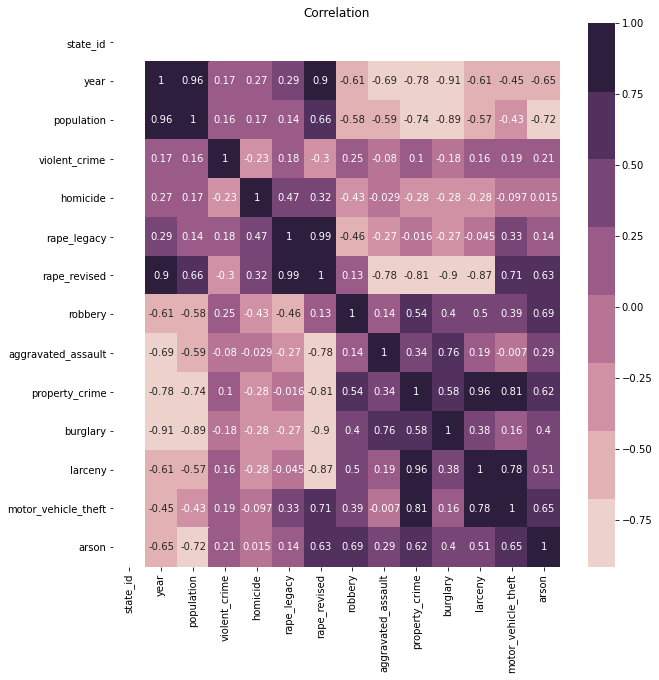

In [22]:
#Graph1 : Heatmap
corr=df2.corr()
fig = plt.figure(figsize=(10,10))
r = sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(8))
r.set_title("Correlation")

In [23]:
#Graph2 : Pie Chart
plt.figure(figsize=(15,10))
labels = 'aggravated-assault', 'arson', 'burglary', 'homicide','human-trafficing','larceny','motor-vehicle-theft','property-crime','rape','rape-legacy','robbery','violent-crime'
sizes=[22108,4637,89025,266,0,364881,58657,512563,2195,4055,11521,39258]
fig = px.pie(labels, values=sizes, names=labels)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [24]:
#Graph3 : Line Plot
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=year, y=homicide, name='homicide',line=dict(color='firebrick', width=4)))
#fig.add_trace(go.Scatter(x=year, y=arson, name='arson',line=dict(color='royalblue', width=4)))
#fig.add_trace(go.Scatter(x=year, y=rape_legacy, name='rape_legacy',line=dict(color='green', width=4, dash='dot')))
fig.show()

In [25]:
#Graph 4 : Bar Plot
plt.figure(figsize=(30,15))
fig = px.bar(df1, x="data_year", y="actual", color="offense", title="Offense")
fig.show()

<Figure size 2160x1080 with 0 Axes>

# Applying Classification Methods

In [26]:
df1.offense =df1.offense.replace("aggravated-assault",0)
df1.offense =df1.offense.replace("arson",1)
df1.offense =df1.offense.replace("burglary",2)
df1.offense =df1.offense.replace("homicide",3)
df1.offense =df1.offense.replace("human-trafficing",4)
df1.offense =df1.offense.replace("larceny",5)
df1.offense =df1.offense.replace("motor-vehicle-theft",6)
df1.offense =df1.offense.replace("property-crime",7)
df1.offense =df1.offense.replace("rape",8)
df1.offense =df1.offense.replace("rape-legacy",9)
df1.offense =df1.offense.replace("robbery",10)
df1.offense =df1.offense.replace("violent-crime",11)

In [27]:
X=df1.drop(['state_abbr','ori','offense'],axis=1)
y=df1.offense

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
knn.score(X_test, y_test)

0.7954545454545454

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
    min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
clf.score(X_test, y_test)

0.4772727272727273